Opening the processed_data.csv 

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('../data/processed_data.csv')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Converting Data

In [2]:
data=data.replace('?',np.nan)
data=data.astype(float)
data=data.fillna(data.mean())

1. Apply PCA to reduce feature dimensionality while maintaining variance.

In [4]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
pca=PCA(n_components=12,svd_solver='full')
pca.fit(data_scaled)
pca.transform(data_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.26127688 0.11544876 0.08933475 0.08025849 0.07118853 0.0626534
 0.06097866 0.05659864 0.05093622 0.04067397 0.03272894 0.03027959]


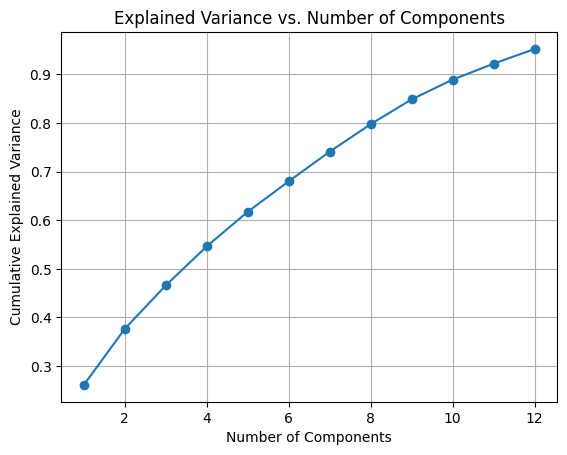

Best n_components: 12


In [5]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

import matplotlib.pyplot as plt
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance,marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

BestN=np.argmax(cumulative_variance>=0.95)+1
print("Best n_components:",BestN)


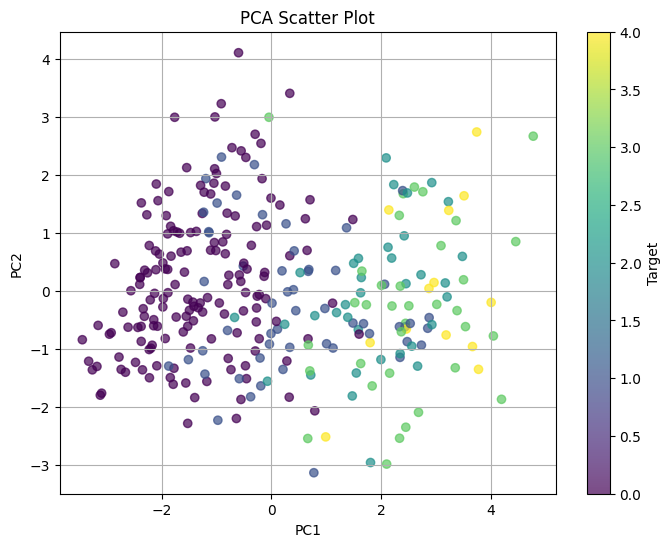

In [6]:
pca = PCA(n_components=12)
pca_result = pca.fit_transform(data_scaled)
pca2D=pca_result[:,:2]
plt.figure(figsize=(8, 6))
plt.scatter(pca2D[:,0],pca2D[:,1],c=data['target'],cmap='viridis',alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Target')
plt.grid()
plt.show()